  ISO3               Country Continent           Hemisphere  \
0  AFG           Afghanistan      Asia  Northern Hemisphere   
1  AGO                Angola    Africa  Southern Hemisphere   
2  ALB               Albania    Europe  Northern Hemisphere   
3  AND               Andorra    Europe  Northern Hemisphere   
4  ARE  United Arab Emirates      Asia  Northern Hemisphere   

  Human Development Groups UNDP Developing Regions  HDI Rank (2021)  \
0                      Low                      SA            180.0   
1                   Medium                     SSA            148.0   
2                     High                     ECA             67.0   
3                Very High                     NaN             40.0   
4                Very High                      AS             26.0   

   Life Expectancy at Birth (1990)  Life Expectancy at Birth (1991)  \
0                          45.9672                          46.6631   
1                          41.8933                  

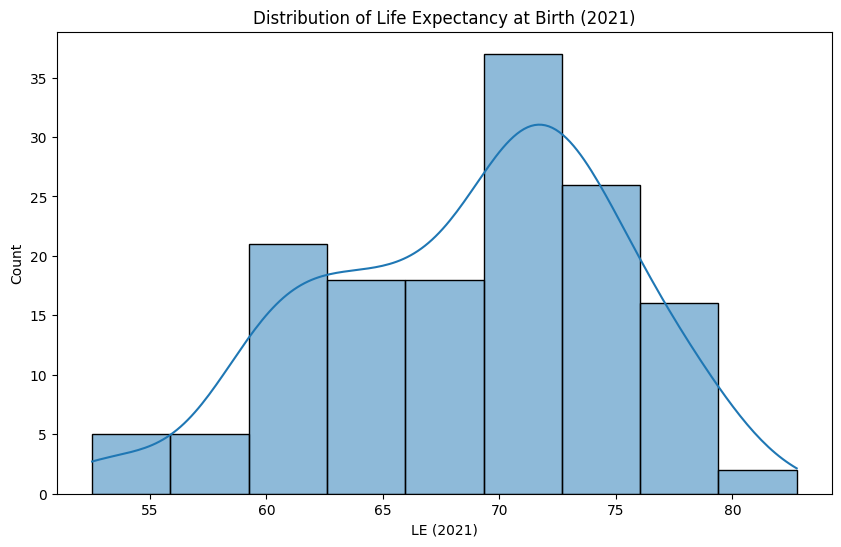

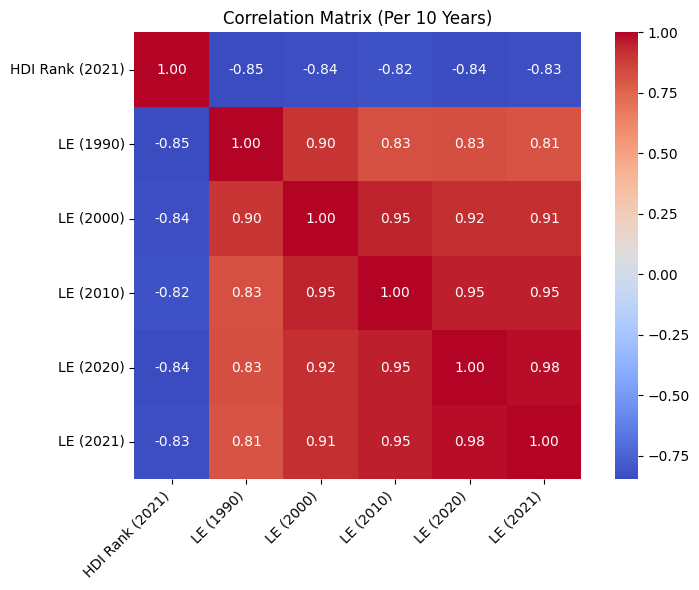


Top Correlated Features with LE (2021):
LE (2020)          0.983768
LE (2010)          0.952127
LE (2000)          0.914006
LE (1990)          0.807835
HDI Rank (2021)   -0.834976
Name: LE (2021), dtype: float64


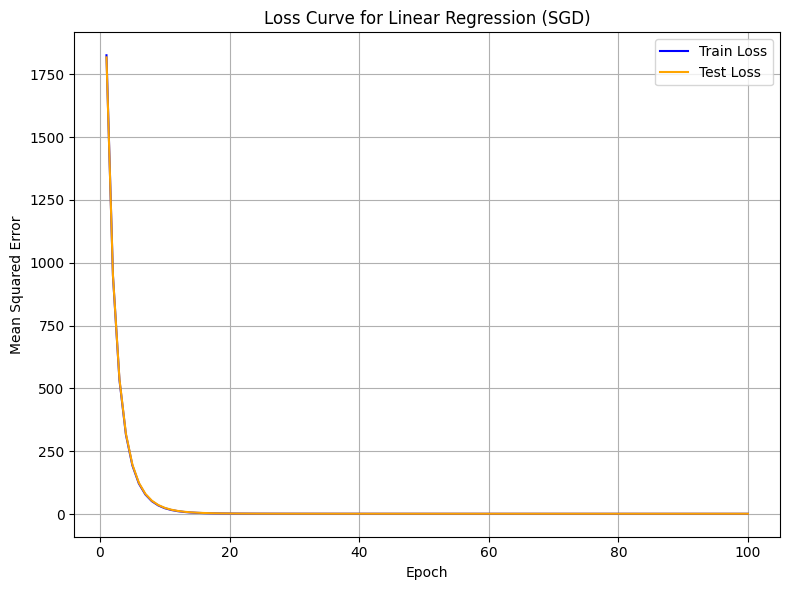

Input features (scaled): [[ 1.55757393  1.08048029  0.91101362  0.9254218  -1.14428938]]
Predicted life expectancy: 77.74 years
Actual life expectancy: 78.72 years

Final Linear Regression Performance:
RMSE: 1.198
R²:   0.966

Model Performance (RMSE):
Linear Regression: 1.198 (R²: 0.966)
Decision Tree:     1.964 (R²: 0.909)
Random Forest:     1.557 (R²: 0.943)


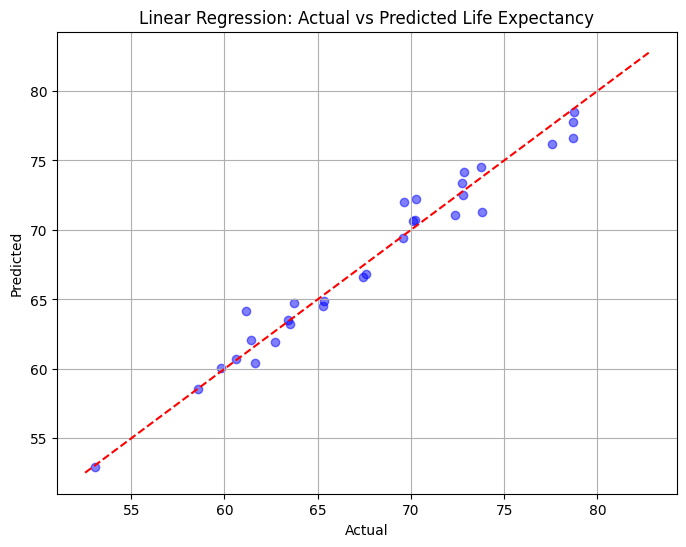


 Best model saved: Linear Regression with RMSE 1.198


In [ ]:
# Linear Regression on Life Expectancy Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r'C:\Users\HP\Documents\linear_regression\Life Expectancy at Birth.csv')  # replace with your path
print(df.head())
print(df.info())

# Drop unnecessary columns
df.drop(columns=['ISO3', 'Country'], inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Rename columns for clarity
df.columns = df.columns.str.replace('Life Expectancy at Birth ', 'LE ')

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['LE (2021)'], kde=True)
plt.title('Distribution of Life Expectancy at Birth (2021)')
plt.xlabel('LE (2021)')
plt.show()

# Correlation matrix using fewer columns (per 10 years for clarity)
selected_cols = [
    'HDI Rank (2021)',
    'LE (1990)',
    'LE (2000)',
    'LE (2010)',
    'LE (2020)',
    'LE (2021)'
]
selected_cols = [col for col in selected_cols if col in df.columns]
corr_matrix_small = df[selected_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_small, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (Per 10 Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Using target for top correlated features
target = 'LE (2021)'
correlations = corr_matrix_small[target].drop(target).sort_values(ascending=False)

print("\nTop Correlated Features with LE (2021):")
print(correlations)

# Use top N features
top_features = correlations.head(5).index.tolist()
X = df[top_features]
y = df[target]

# Convert non-numeric features
if 'Continent' in df.columns:
    df = pd.get_dummies(df, columns=['Continent'], drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression for loss curve with manual epoch tracking

n_epochs = 100
train_losses = []
test_losses = []

lr_model = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate='invscaling',
                        warm_start=True, random_state=42)

for epoch in range(n_epochs):
    lr_model.partial_fit(X_train, y_train)
    
    # Predict for train and test
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)
    
    # Compute MSE for train and test
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, n_epochs+1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Take one test sample
single_sample = X_test[0].reshape(1, -1)

# Predict using the trained model
single_pred = lr_model.predict(single_sample)

# Actual target value
actual_value = y_test.iloc[0]

print(f"Input features (scaled): {single_sample}")
print(f"Predicted life expectancy: {single_pred[0]:.2f} years")
print(f"Actual life expectancy: {actual_value:.2f} years")

# Evaluate final model
lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print(f"\nFinal Linear Regression Performance:")
print(f"RMSE: {lr_rmse:.3f}")
print(f"R²:   {lr_r2:.3f}")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
dt_r2 = r2_score(y_test, dt_preds)

# Random Forest Regressor 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# Model Comparison
print("\nModel Performance (RMSE):")
print(f"Linear Regression: {lr_rmse:.3f} (R²: {lr_r2:.3f})")
print(f"Decision Tree:     {dt_rmse:.3f} (R²: {dt_r2:.3f})")
print(f"Random Forest:     {rf_rmse:.3f} (R²: {rf_r2:.3f})")

# Visualize LR predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_preds, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Life Expectancy')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Save the best model
best_model = min(
    [('Linear Regression', lr_model, lr_rmse),
     ('Decision Tree', dt_model, dt_rmse),
     ('Random Forest', rf_model, rf_rmse)],
    key=lambda x: x[2]
)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model[1], f)

print(f"\n Best model saved: {best_model[0]} with RMSE {best_model[2]:.3f}")
